In [1]:
!pip install chardet
##importing useful libraries
import pandas as pd
import numpy as np
import chardet

In [3]:
##Reading the file
with open("FIFA World Cup Award Winner 1930-2022.csv",'rb') as f:
    result = chardet.detect(f.read())
    
df=pd.read_csv("FIFA World Cup Award Winner 1930-2022.csv",encoding = result["encoding"])

In [4]:
##showing starting values
df.head()

,Key ID,Tournament Id,Tournament Name,Award Id,Award Name,Shared,Player Id,Family Name,Give Name,Team Id,Team Name,Team Code
0,1,WC-1930,1930 FIFA World Cup,A-4,Golden Boot,0,P-01708,Stábile,Guillermo,T-03,Argentina,ARG
1,2,WC-1930,1930 FIFA World Cup,A-5,Silver Boot,0,P-06624,Cea,Pedro,T-81,Uruguay,URY
2,3,WC-1930,1930 FIFA World Cup,A-6,Bronze Boot,0,P-08936,Patenaude,Bert,T-80,United States,USA
3,4,WC-1934,1934 FIFA World Cup,A-4,Golden Boot,0,P-03976,Nejedlý,Old?ich,T-20,Czechoslovakia,CSK
4,5,WC-1934,1934 FIFA World Cup,A-5,Silver Boot,1,P-08398,Conen,Edmund,T-29,Germany,DEU


In [7]:
df.isnull().sum()


Key ID             0
Tournament Id      0
Tournament Name    0
Award Id           0
Award Name         0
Shared             0
Player Id          0
Family Name        0
Give Name          0
Team Id            0
Team Name          0
Team Code          0
dtype: int64

In [8]:
#ADDING NEW COLOUMN IN THE TABLE FOR YEAR OF COMPETITION 
year_l=[]
for i in df["Tournament Name"]:
    year = int(i[0:4])
    year_l.append(year)

year_l=np.array(year_l)

df.insert(2,'YEAR',year_l)
df.head()

,Key ID,Tournament Id,YEAR,Tournament Name,Award Id,Award Name,Shared,Player Id,Family Name,Give Name,Team Id,Team Name,Team Code
0,1,WC-1930,1930,1930 FIFA World Cup,A-4,Golden Boot,0,P-01708,Stábile,Guillermo,T-03,Argentina,ARG
1,2,WC-1930,1930,1930 FIFA World Cup,A-5,Silver Boot,0,P-06624,Cea,Pedro,T-81,Uruguay,URY
2,3,WC-1930,1930,1930 FIFA World Cup,A-6,Bronze Boot,0,P-08936,Patenaude,Bert,T-80,United States,USA
3,4,WC-1934,1934,1934 FIFA World Cup,A-4,Golden Boot,0,P-03976,Nejedlý,Old?ich,T-20,Czechoslovakia,CSK
4,5,WC-1934,1934,1934 FIFA World Cup,A-5,Silver Boot,1,P-08398,Conen,Edmund,T-29,Germany,DEU


In [9]:
df = df.drop("Tournament Name",axis =1)

In [10]:
Name  =[]
for i in range(len(df)):
    str = df["Family Name"][i]+" "+df["Give Name"][i]
    Name.append(str)

Name = np.array(Name)

df.insert(7,'Player Name',Name)

In [12]:
df.shape

(141, 13)

In [13]:
df.head()

,Key ID,Tournament Id,YEAR,Award Id,Award Name,Shared,Player Id,Player Name,Family Name,Give Name,Team Id,Team Name,Team Code
0,1,WC-1930,1930,A-4,Golden Boot,0,P-01708,Stábile Guillermo,Stábile,Guillermo,T-03,Argentina,ARG
1,2,WC-1930,1930,A-5,Silver Boot,0,P-06624,Cea Pedro,Cea,Pedro,T-81,Uruguay,URY
2,3,WC-1930,1930,A-6,Bronze Boot,0,P-08936,Patenaude Bert,Patenaude,Bert,T-80,United States,USA
3,4,WC-1934,1934,A-4,Golden Boot,0,P-03976,Nejedlý Old?ich,Nejedlý,Old?ich,T-20,Czechoslovakia,CSK
4,5,WC-1934,1934,A-5,Silver Boot,1,P-08398,Conen Edmund,Conen,Edmund,T-29,Germany,DEU


In [14]:
df=df.drop({"Give Name","Family Name"},axis =1)

In [15]:
df.head()

,Key ID,Tournament Id,YEAR,Award Id,Award Name,Shared,Player Id,Player Name,Team Id,Team Name,Team Code
0,1,WC-1930,1930,A-4,Golden Boot,0,P-01708,Stábile Guillermo,T-03,Argentina,ARG
1,2,WC-1930,1930,A-5,Silver Boot,0,P-06624,Cea Pedro,T-81,Uruguay,URY
2,3,WC-1930,1930,A-6,Bronze Boot,0,P-08936,Patenaude Bert,T-80,United States,USA
3,4,WC-1934,1934,A-4,Golden Boot,0,P-03976,Nejedlý Old?ich,T-20,Czechoslovakia,CSK
4,5,WC-1934,1934,A-5,Silver Boot,1,P-08398,Conen Edmund,T-29,Germany,DEU


In [16]:
watch.info()

NameError: name 'watch' is not defined

In [18]:
#ANALYSING THE DATA

df["Award Name"].unique()


array(['Golden Boot', 'Silver Boot', 'Bronze Boot', 'Best Young Player',
       'Golden Ball', 'Silver Ball', 'Bronze Ball', 'Golden Glove'],
      dtype=object)

In [19]:
##seeing top 10 player who won max number of awards
pl= df.groupby("Player Name").size().sort_values(ascending = False).head(10)

In [20]:
pl.head

<bound method NDFrame.head of Player Name
Müller Thomas             4
Ronaldo not applicable    4
Maradona Diego            3
Rossi Paolo               3
Cubillas Teófilo          3
Mbappé Kylian             3
Messi Lionel              3
Lineker Gary              2
Klose Miroslav            2
Schillaci Salvatore       2
dtype: int64>

<AxesSubplot:title={'center':'Player with highest award'}, xlabel='Player Name', ylabel='No. of awards'>

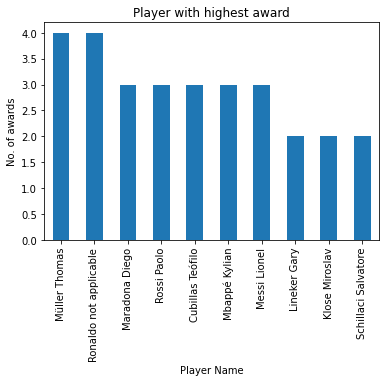

In [21]:
pl.plot(kind="bar",title="Player with highest award",ylabel ="No. of awards")

<AxesSubplot:title={'center':'Country wise awards'}, xlabel='Team Name', ylabel='No. of awards'>

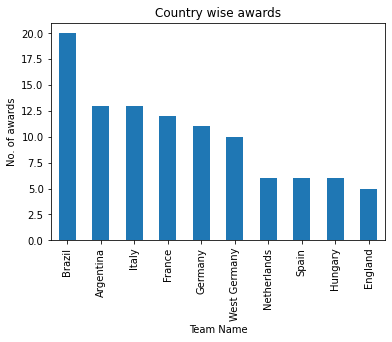

In [22]:
## CHECKING WHICH COUNTRY WON AWARD MAXIMUM NUMBER OF TIME

df.groupby("Team Name").size().sort_values(ascending = False).head(10).plot(kind = "bar",title ="Country wise awards",ylabel="No. of awards")